In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import util as utils
import os.path
from IPython.display import display
import ipywidgets as widgets


In [2]:
precision = 0.005 # m/z precision for raw data
data_per_sec = 2 # spectrum per second
half_time_window = 30 # time range before and after RT in sec
number_ticks = half_time_window * 2 * data_per_sec  # number of spectrum per data
intensity_treshold = 8000 #  everything under this will be annotated false

mzMl_folder =  '../data/julijana_datatest/mzML/'
mz_files = ["F1.mzML", "F10.mzML", "F11.mzML", "F12.mzML", "F13.mzML", "F14.mzML", "F15.mzML", "F17.mzML", "F18.mzML", "F19.mzML", "F20.mzML", "F21.mzML", "F22.mzML", "F23.mzML", "F24.mzML", "F25.mzML", "F26.mzML", "F27.mzML", "F28.mzML", "F29.mzML", "F30.mzML", "F31.mzML", "F32.mzML", "M1.mzML", "M2.mzML", "M3.mzML", "M4.mzML", "M6.mzML", "M7.mzML", "M8.mzML", "M9.mzML", "M10.mzML", "M11.mzML", "M12.mzML", "M12bis.mzML", "M13.mzML", "M13bis.mzML", "M14.mzML", "M15.mzML", "M18.mzML", "M19.mzML", "M20.mzML", "M21.mzML", "M23.mzML", "M24.mzML", "M25.mzML", "QC_01.mzML", "QC_02.mzML", "QC_03.mzML", "QC_04.mzML"]

raw_peak =  '../data/julijana_datatest/raw_features_lipido_neg.csv'

pickle_path = './output/pickle_sample/'

In [110]:
class Factory:
    def __init__(self):
        self.features = {}
        self.samples = {}

    def get_feature(self):

        return [[mz, ff['rt'] * 60 ] for mz, ff in self.features.items()]

    def add_raw_peak(self, file):

        with open(file, newline='') as f:

            reader = csv.reader(f,delimiter=';',)
            next(reader)

            for line in list(reader):
                self.features[float(line[2])] =  {'rt' :float(line[1]), 'manual_annotation': None, 'dl_annotation': None }

    def add_samples(self, list_file):

        cptf = 0
        for f in list_file:

            sample_id = f.split('.')[0]
            pick_f = pickle_path + sample_id  + '.npy'

            if not os.path.exists(pick_f):

                list_features = self.get_feature()
                datum = utils.get_data_mz_batch( mzMl_folder + f, list_features)

                X_ = datum[0]
                y_ =  datum[1]
                mz_ = datum[2]
                rt_ =  datum[3]

                with open(pick_f, 'wb') as fi:
                    pass
                    np.save(fi, np.asanyarray([X_, y_, mz_, rt_], dtype=object))

            data = np.load(pick_f, allow_pickle=True)
            s = Sample(sample_id)
            s.data_ = data[0]
            s.annotation_ =  data[1]
            s.mz_ = data[2]
            s.rt_ =  data[3]

            self.samples[sample_id] = s
            print("File {} / {}".format(cptf, len(list_file)))
            cptf += 1

    def plot(self, mz):


        * T0|T72 hiX ctrl|exp

        data_0_E = []
        data_0_C = []
        data_72_E = []
        data_72_C = []
        data_QC = []

        for sample_name, sample in self.samples.items():
            idx = np.where(sample.mz_ == float(mz))[0]
            if len(idx)>0:
                if 'ctrl' in sample_name:
                    if 'TO' in sample_name:
                        data_0_C.append(sample.data_[idx[0]])
                    elif 'T72' in sample_name:
                        data_72_C.append(sample.data_[idx[0]])
                elif 'exp' in sample_name:
                    if 'TO' in sample_name:
                        data_0_E.append(sample.data_[idx[0]])
                    elif 'T72' in sample_name:
                        data_72_E.append(sample.data_[idx[0]])
                elif sample_name[0] == 'Q' and 'cond' not in sample_name:
                    data_QC.append(sample.data_[idx[0]])

        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(2, 3)


        for fdata in data_0_C:
            axis[0, 0].plot(fdata)
        axis[0, 0].set_title("Ctrl T0" )

        for fdata in data_72_C:
            axis[1, 0].plot(fdata)
        axis[1, 0].set_title("Ctrl T72" )


        for fdata in data_0_E:
            axis[0, 1].plot(fdata)
        axis[0, 1].set_title("Exp T0" )

        for fdata in data_72_E:
            axis[1, 1].plot(fdata)
        axis[1, 1].set_title("Exp T72" )

        for qdata in data_QC:
            axis[0, 2].plot(qdata)
        axis[0, 2].set_title("QC")

        axis[0, 2].plot([])
        axis[1, 2].set_title("mz:" + str(mz) + " rt:" + str(sample.rt_[idx[0]]) )

        # Combine all the operations and display
        plt.show()


class Sample:
    def __init__(self, id):
        self.id = id
        self.data_ = []
        self.annotation_ = []
        self.mz_ = []
        self.rt_ = []
        self.annotation_mz = {}

In [111]:
data = Factory()
data.add_raw_peak(raw_peak)
data.add_samples(mz_files)

File 0 / 50
File 1 / 50
File 2 / 50
File 3 / 50
File 4 / 50
File 5 / 50
File 6 / 50
File 7 / 50
File 8 / 50
File 9 / 50
File 10 / 50
File 11 / 50
File 12 / 50
File 13 / 50
File 14 / 50
File 15 / 50
File 16 / 50
File 17 / 50
File 18 / 50
File 19 / 50
File 20 / 50
File 21 / 50
File 22 / 50
File 23 / 50
File 24 / 50
File 25 / 50
File 26 / 50
File 27 / 50
File 28 / 50
File 29 / 50
File 30 / 50
File 31 / 50
File 32 / 50
File 33 / 50
File 34 / 50
File 35 / 50
File 36 / 50
File 37 / 50
File 38 / 50
File 39 / 50
File 40 / 50
File 41 / 50
File 42 / 50
File 43 / 50
File 44 / 50
File 45 / 50
File 46 / 50
File 47 / 50
File 48 / 50
File 49 / 50


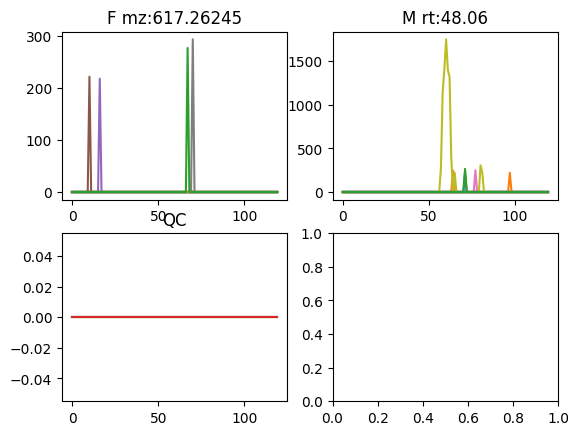

Button(description='Add 617.26245 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

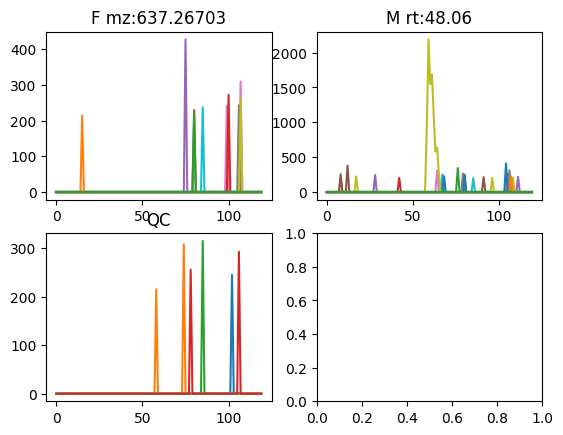

Button(description='Add 637.26703 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

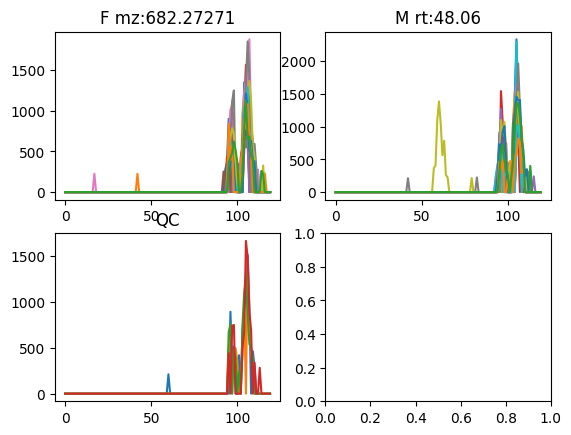

Button(description='Add 682.27271 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

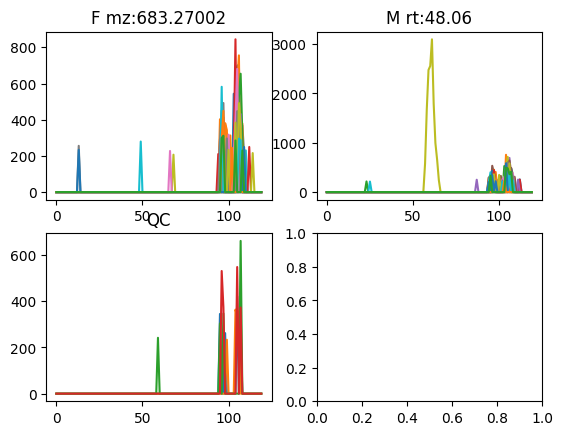

Button(description='Add 683.27002 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

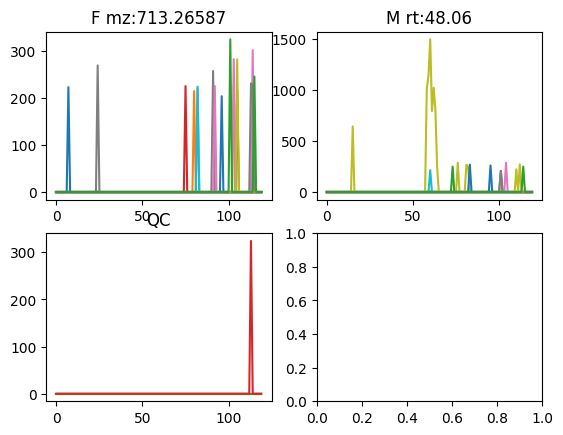

Button(description='Add 713.26587 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

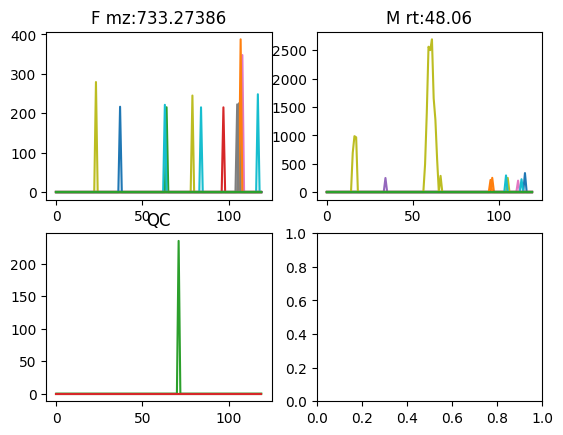

Button(description='Add 733.27386 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

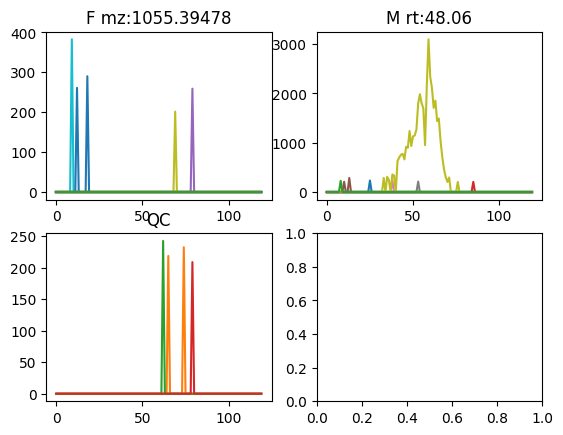

Button(description='Add 1055.39478 at 0.801', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

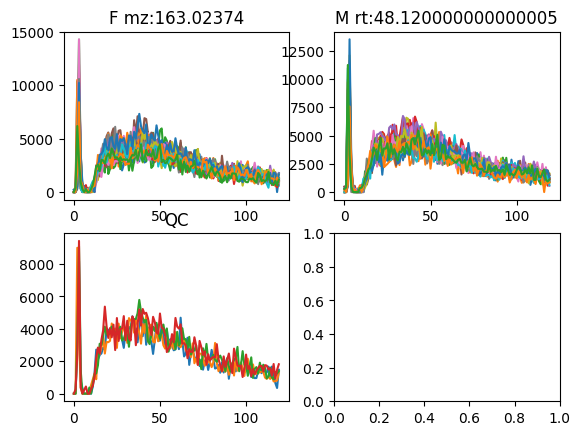

Button(description='Add 163.02374 at 0.802', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

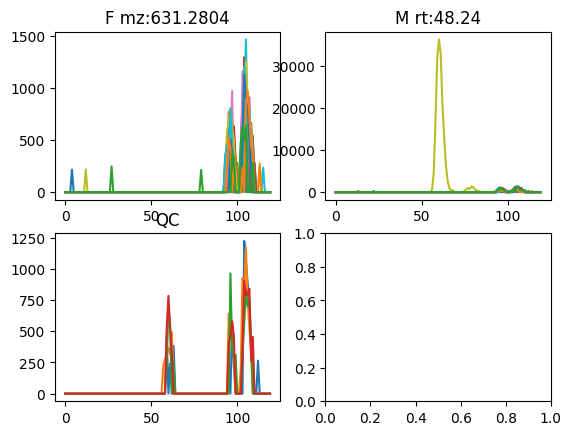

Button(description='Add 631.2804 at 0.804', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

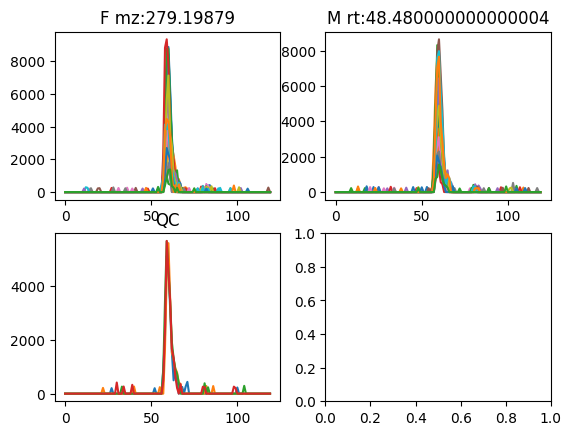

Button(description='Add 279.19879 at 0.808', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

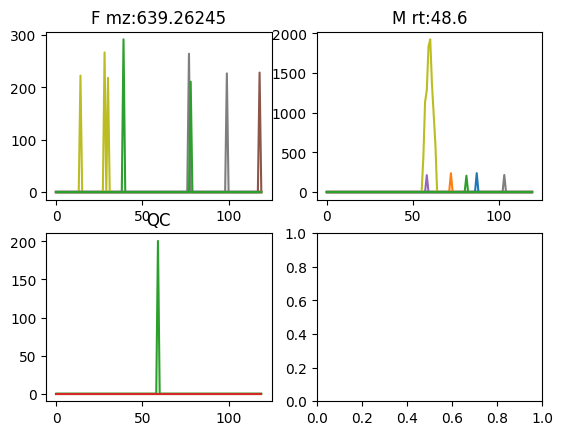

Button(description='Add 639.26245 at 0.81', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

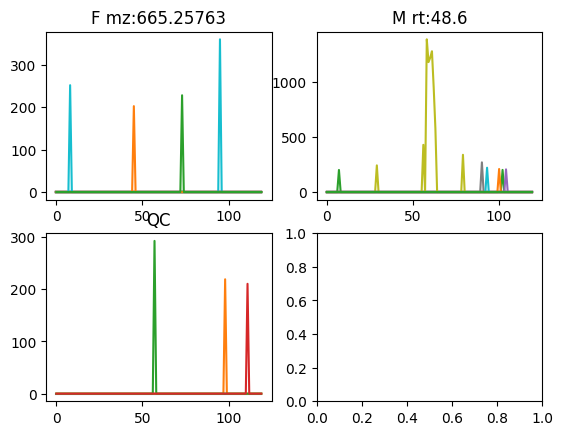

Button(description='Add 665.25763 at 0.81', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

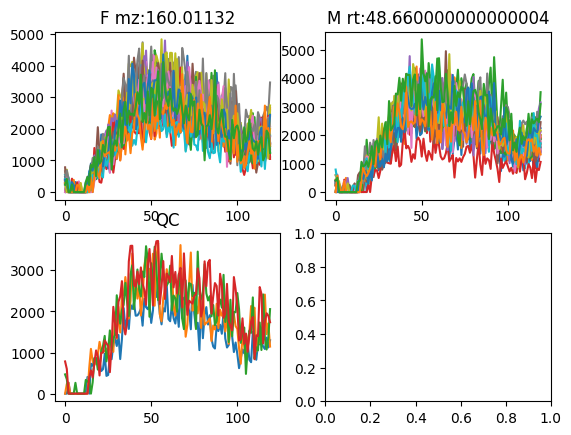

Button(description='Add 160.01132 at 0.811', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

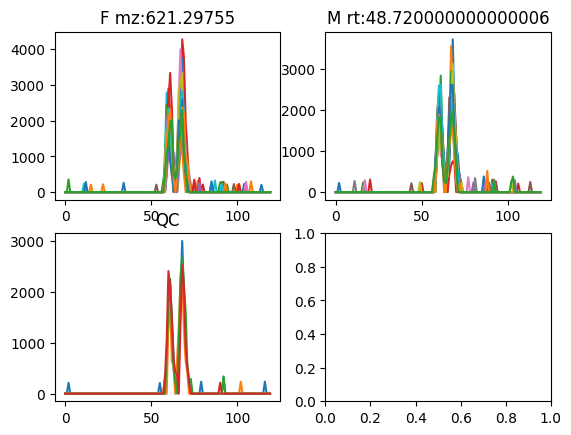

Button(description='Add 621.29755 at 0.812', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

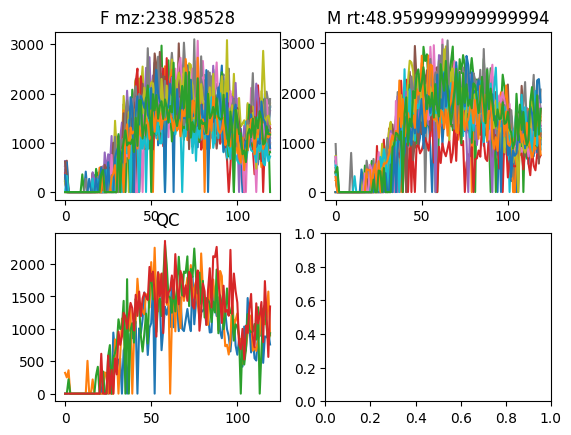

Button(description='Add 238.98528 at 0.816', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

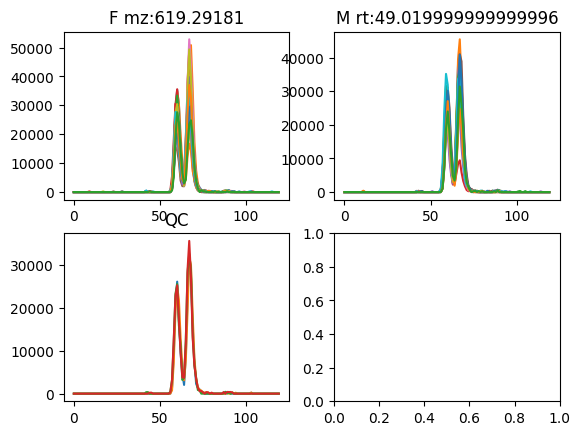

Button(description='Add 619.29181 at 0.817', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

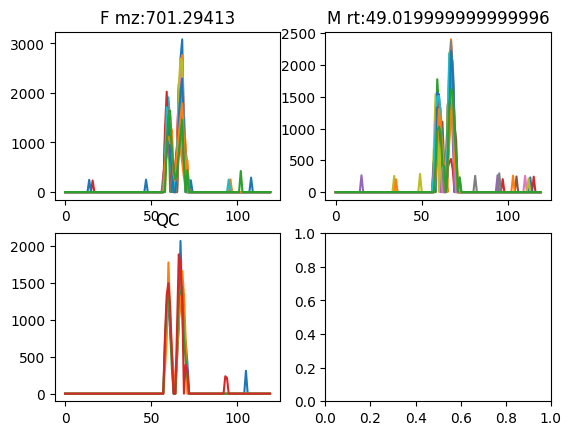

Button(description='Add 701.29413 at 0.817', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

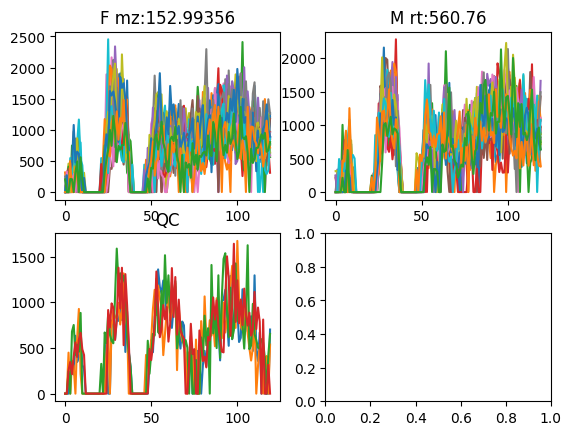

Button(description='Add 152.99356 at 9.346', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

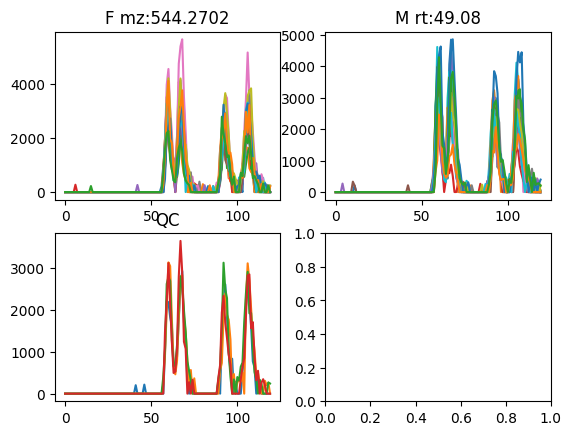

Button(description='Add 544.2702 at 0.818', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

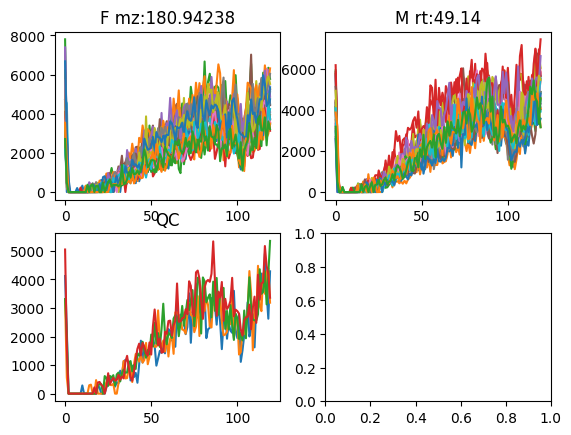

Button(description='Add 180.94238 at 0.819', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

In [112]:
collector = {}

def clicked(arg):
    collector[arg.mzrt[0]] = arg.mzrt[1]

for f in list(data.features.keys())[:20]:

    rt = data.features[f]['rt']

    if (rt > 0.8 and rt < 13):

        data.plot(f)
        layout = widgets.Layout(width='auto', height='40px') #set width and height
        button_download = widgets.Button(layout=layout, description = 'Add '+ str(f)  +' at ' + str(rt ))
        button_download.mzrt = [f, rt]
        button_download.on_click(clicked)
        display(button_download)

In [87]:
collector

{180.94238: 0.013649999999999999, 544.2702: 0.013633333333333332}

In [107]:
reader = csv.reader(open(raw_peak),delimiter=';')
header = list(reader)[0]

reader = csv.reader(open(raw_peak),delimiter=';')
next(reader)
filtered = filter(lambda p: float(p[2]) in collector, reader)

r = list(filtered)
r.insert(0, header)
print(r[0])
csv.writer(open(r"test.csv",'w'),delimiter=';').writerows(r)

['Alignment ID', 'Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned', 'Reference RT', 'Reference m/z', 'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'Annotation tag (VS1.0)', 'RT matched', 'm/z matched', 'MS/MS matched', 'MS1 isotopic spectrum', 'MS/MS spectrum', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M12bis', 'M13', 'M13bis', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'QC_01', 'QC_02', 'QC_03', 'QC_04', 'QC_05', 'QC_06', 'QC_07', 'QC_dil_6.25_end', 'QC_dil_6.25_start', 'QC_dil_12.5_end', 'QC_dil_12.5_start', 'QC_dil_25_end', 'QC_dil_25_start', 'QC_dil_50_end', 'QC_dil_50_start', 'QC_dil_100_end', 'QC_dil_100_start', 'QC_IT001', 'QC_IT002', 

{180.94238: 0.013649999999999999, 544.2702: 0.013633333333333332}